# HW0 - Hello Vision World

In this HW you'll get acquainted with OpenCV in a Python-Jupyter environment.

If you're able to read this you were probably successfull at creating a Python-Jupyter environment.

Next we will import OpenCV, which is called `cv2` (that's the name of the OpenCV module) in python.

In [1]:
import cv2
import numpy as np

If that executed without an error - you were also able to install OpenCV.

If that didn't run, try running `pip install opencv-python` or `apt-get install python-opencv` on ubuntu.

Next we will load a test image from scikit-image (`skimage`).

In [2]:
import skimage.data

In [3]:
image = skimage.data.astronaut()

An image is an array of pixels. It has HxWxC shape: (we can interrogate an image for its shape using `.shape`)

In [4]:
image.shape

(512, 512, 3)

This image has Height and Width of 512, and 3 channels: Red, Green, Blue

The channels are the last dimension, meaning the image is stored in memory where every pixel has 3 components, like so: RGB, RGB, RGB, RGB, ...

In [5]:
image[0,0]

array([154, 147, 151], dtype=uint8)

The first pixel in the image has the RGB code: `(154, 147, 151)`, which is kind of a grayish color.

Let's plot out a small patch of the image (10x10 pixels top-left):

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

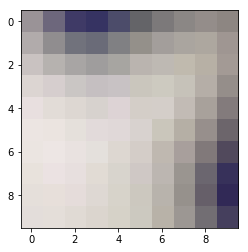

In [7]:
plt.imshow(image[0:10,0:10])

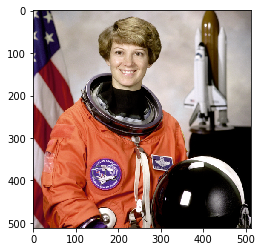

In [8]:
plt.imshow(image)

We can do many things with images, such as make them grayscale:

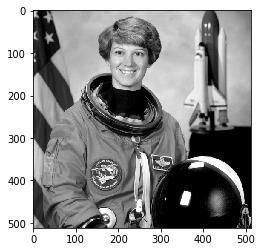

In [9]:
plt.imshow(cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY), cmap='gray')

By default images have values \[0,255\] and their pixels are stored in `uint8` (bytes, unsigned chars)

In [10]:
image.dtype

dtype('uint8')

But we can change that easily, say to 32-bit floating point (e.g. `float32`):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


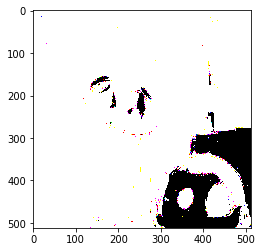

In [11]:
plt.imshow(image.astype(np.float32))

Ah, Matplotlib is complaining that floating point images are usually in range of \[0,1\] and not \[0,255\] like `uint8`s.

So we can easily divide the values element-wise:

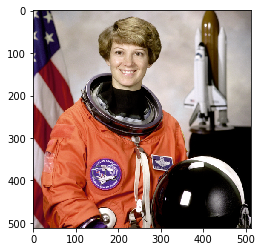

In [12]:
plt.imshow(image.astype(np.float32) / 255.)

Now it looks the same as before.

We can also flip images in different directions:

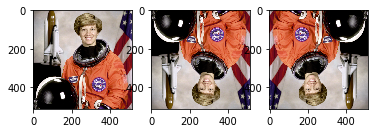

In [13]:
plt.subplot(1,3,1),plt.imshow(cv2.flip(image.copy(), 1))
plt.subplot(1,3,2),plt.imshow(cv2.flip(image.copy(), -1))
plt.subplot(1,3,3),plt.imshow(cv2.flip(image.copy(), 0));

We can blur them:

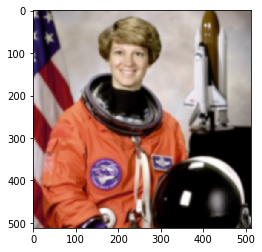

In [14]:
plt.imshow(cv2.GaussianBlur(image.copy(), ksize=(11,11), sigmaX=-1))

---
---

## Here comes your part

<img src="http://thuglifememe.com/wp-content/uploads/2017/08/22-you-got-this-meme-9.jpg"/>

### Image blur

1) Load the astronaut image to a variable, convert to grayscale and convert to a [0,1] floating point.

2) Blur it with a 11x11 **Box filter** (`cv2.boxFilter`), and a 11x11 **Gaussian filter**

3) Subtract the blurred images from the original

4) Show the results to the notebook (`plt.imshow(...)`) side-by-side (`plt.subplot(1,2,1)`), with a colorbar (`plt.colorbar()`)

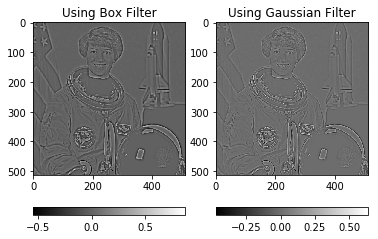

In [15]:
# TODO: your code here
image = skimage.data.astronaut()

image_grayscale = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY).astype(np.float32) / 255.
image_grayscale_box_blur = cv2.boxFilter(image_grayscale.copy(), -1, ksize=(11,11))
image_grayscale_gaussian_blur = cv2.GaussianBlur(image_grayscale.copy(), ksize=(11,11), sigmaX=-1)

image_diff_1 = image_grayscale - image_grayscale_box_blur
image_diff_2 = image_grayscale - image_grayscale_gaussian_blur

plt.subplot(1,2,1), plt.imshow(image_diff_1, cmap = 'gray'), plt.title('Using Box Filter')
plt.colorbar(orientation = 'horizontal')
plt.subplot(1,2,2), plt.imshow(image_diff_2, cmap = 'gray'), plt.title('Using Gaussian Filter')
plt.colorbar(orientation = 'horizontal')

See how subtracting the blur (low frequencies) from the original has left only the edges (high frequencies).

Try different kernel sizes to see the effect on the edges.

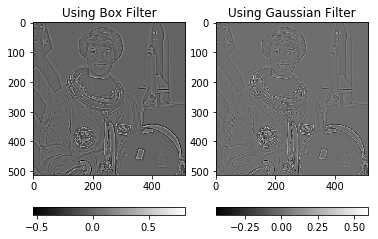

In [16]:
# Reducing kernel to 9*9
image = skimage.data.astronaut()

image_grayscale = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY).astype(np.float32) / 255.
image_grayscale_box_blur = cv2.boxFilter(image_grayscale.copy(), -1, ksize=(9,9))
image_grayscale_gaussian_blur = cv2.GaussianBlur(image_grayscale.copy(), ksize=(9,9), sigmaX=-1)

image_diff_1 = image_grayscale - image_grayscale_box_blur
image_diff_2 = image_grayscale - image_grayscale_gaussian_blur

plt.subplot(1,2,1), plt.imshow(image_diff_1, cmap = 'gray'), plt.title('Using Box Filter')
plt.colorbar(orientation = 'horizontal')
plt.subplot(1,2,2), plt.imshow(image_diff_2, cmap = 'gray'), plt.title('Using Gaussian Filter')
plt.colorbar(orientation = 'horizontal')

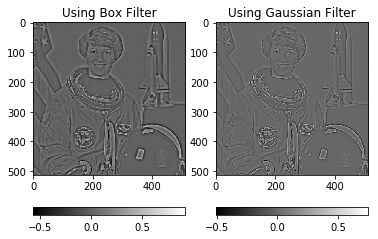

In [17]:
# Increasing kernel to 15*15
image = skimage.data.astronaut()

image_grayscale = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY).astype(np.float32) / 255.
image_grayscale_box_blur = cv2.boxFilter(image_grayscale.copy(), -1, ksize=(15,15))
image_grayscale_gaussian_blur = cv2.GaussianBlur(image_grayscale.copy(), ksize=(15,15), sigmaX=-1)

image_diff_1 = image_grayscale - image_grayscale_box_blur
image_diff_2 = image_grayscale - image_grayscale_gaussian_blur

plt.subplot(1,2,1), plt.imshow(image_diff_1, cmap = 'gray'), plt.title('Using Box Filter')
plt.colorbar(orientation = 'horizontal')
plt.subplot(1,2,2), plt.imshow(image_diff_2, cmap = 'gray'), plt.title('Using Gaussian Filter')
plt.colorbar(orientation = 'horizontal')

### Colorspaces

1) Load the astronaut image (RGB)

2) Convert to HSV (`cv2.cvtColor`)

3) Display the H, S and V components, side-by-side

(<matplotlib.axes._subplots.AxesSubplot at 0x11a1b2cf8>,
 Text(0.5, 1.0, 'V'))

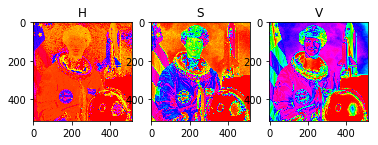

In [18]:
# TODO: your code here
image = skimage.data.astronaut()
image_hsv = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2HSV)

plt.subplot(1,3,1),plt.imshow(image_hsv[:,:,0], cmap = 'hsv'), plt.title('H')
plt.subplot(1,3,2),plt.imshow(image_hsv[:,:,1], cmap = 'hsv'), plt.title('S')
plt.subplot(1,3,3),plt.imshow(image_hsv[:,:,2], cmap = 'hsv'), plt.title('V')

### 3D Projection

Consider a group of 3D points. 

We have a 100 uniformly distributed points in a volume XYZ: \[-5,5\],\[-5,5\],\[5,100\] (the units are, say, meters).

Some points are close to us (the camera at `(0,0,0)`), they have low Z values, and some are farther away.

In [19]:
pts3d = np.hstack([np.random.uniform(-5,5,(1000,2)),np.random.uniform(5,100,(1000,1))])[:,np.newaxis,:]

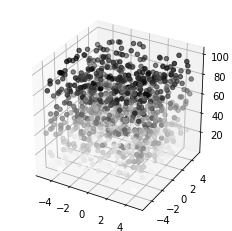

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pts3d[:,0,0],pts3d[:,0,1],pts3d[:,0,2],c=-pts3d[:,0,2],cmap='gray');
ax.set_aspect('equal');

You're given the following intrinsics matrix (`K`):

In [21]:
K = np.array([[800,0,320],[0,800,240],[0,0,1]], dtype=np.float32)
print(K)

[[ 800.    0.  320.]
 [   0.  800.  240.]
 [   0.    0.    1.]]


Calculate the 2D projection of the 3D points on the image plane, and plot them (`plt.scatter`).

Try doing the calculation yourself, using matrix multiplication for the entire group, and also using `cv2.projectPoints`.

Try changing the `K` matrix focal length parameters to see how it affects the projection.

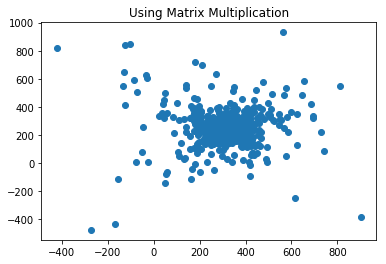

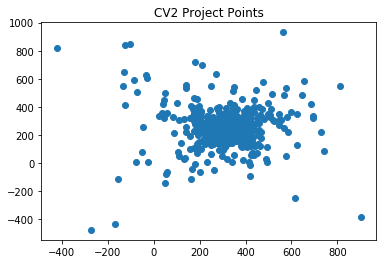

In [22]:
# TODO: your code here

# Matrix multiplication for entire group
pts3d_trans = pts3d.reshape((1000, 3)).T
pts2d = np.divide(np.dot(K, pts3d_trans), pts3d_trans[2,:])

plt.scatter(pts2d[0,:], pts2d[1,:])
plt.title('Using Matrix Multiplication')
plt.show()

# CV2 Project points 
pts2d, _ = cv2.projectPoints(pts3d, np.eye(3), np.zeros((1, 3), dtype=np.float32), K, np.empty((0,0)))

plt.scatter(pts2d[:,0,0], pts2d[:,0,1])
plt.title('CV2 Project Points')
plt.show()

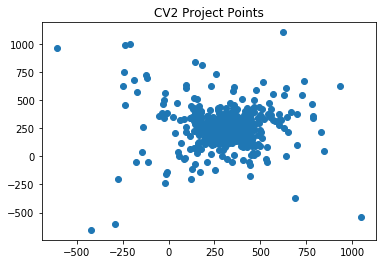

In [23]:
# Experimenting with new K
new_K = np.array([[1000,0,320],[0,1000,240],[0,0,1]], dtype=np.float32)

# CV2 Project points 
pts2d, _ = cv2.projectPoints(pts3d, np.eye(3), np.zeros((1, 3), dtype=np.float32), new_K, np.empty((0,0)))

plt.scatter(pts2d[:,0,0], pts2d[:,0,1])
plt.title('CV2 Project Points')
plt.show()

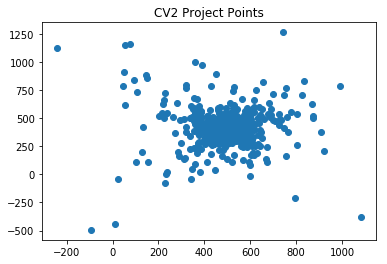

In [24]:
# Experimenting with new K
new_K = np.array([[800,0,500],[0,1000,400],[0,0,1]], dtype=np.float32)

# CV2 Project points 
pts2d, _ = cv2.projectPoints(pts3d, np.eye(3), np.zeros((1, 3), dtype=np.float32), new_K, np.empty((0,0)))

plt.scatter(pts2d[:,0,0], pts2d[:,0,1])
plt.title('CV2 Project Points')
plt.show()

Consider a 3D cube:

In [25]:
# cube veritces
Z = np.array([[-1,-1,-1],[1,-1,-1],[1,1,-1],[-1,1,-1],[-1,-1,1],[1,-1,1],[1,1,1],[-1,1,1]])
Z[:,2] += 10 # translate on Z
Z[:,0] += 2  # translate on X

# list of faces
faces = [[Z[0],Z[1],Z[2],Z[3]],
         [Z[4],Z[5],Z[6],Z[7]], 
         [Z[0],Z[1],Z[5],Z[4]], 
         [Z[2],Z[3],Z[7],Z[6]], 
         [Z[1],Z[2],Z[6],Z[5]],
         [Z[4],Z[7],Z[3],Z[0]]]

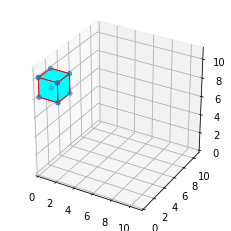

In [26]:
# Plot the cube in 3D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.75))
ax.scatter(Z[:,0], Z[:,1], Z[:,2])
ax.set_xlim(0,11), ax.set_ylim(0,11), ax.set_zlim(0,11)
ax.set_aspect('equal') # uniform scale axes

Use the same method from before to project the 3D points to 2D

In [27]:
Z = Z.astype(np.float32)
pts2d, _ = cv2.projectPoints(Z, np.eye(3), np.zeros((1, 3), dtype=np.float32),\
                             K, np.empty((0,0))) # TODO: your code here

In [28]:
# list of 2D faces
faces2d = [[pts2d[0],pts2d[1],pts2d[2],pts2d[3]],
           [pts2d[4],pts2d[5],pts2d[6],pts2d[7]], 
           [pts2d[0],pts2d[1],pts2d[5],pts2d[4]], 
           [pts2d[2],pts2d[3],pts2d[7],pts2d[6]], 
           [pts2d[1],pts2d[2],pts2d[6],pts2d[5]],
           [pts2d[4],pts2d[7],pts2d[3],pts2d[0]]]

Now we can plot the cube projected on our 2D image:

(0, 480)

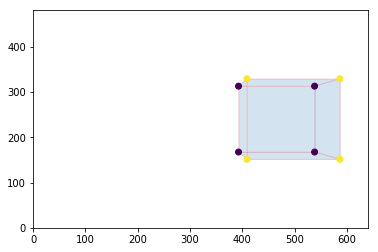

In [29]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
patches = []
for p in np.array(faces2d):
    patches += [Polygon(np.squeeze(p), True)]

fig=plt.figure()
ax = fig.add_subplot(111)
ax.add_collection(PatchCollection(patches, alpha=0.1, linewidths=1, edgecolors='r'))
ax.scatter(pts2d[:,0,0],pts2d[:,0,1],c=-Z[:,2])
ax.set_xlim(0,640)
ax.set_ylim(0,480)

Try to change the translation of the 3D points, as well as the K matrix, and see how it affects the 2D projection.